In [ ]:
import sys
import os

# Go up two levels from notebook (Training/MLR) to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(project_root)

# Ensure the model save directory exists
model_save_path = os.path.join('.')
os.makedirs(model_save_path, exist_ok=True)  # Creates directory if it doesn't exist

In [ ]:
import pandas as pd
from Training.Helper.dataPreprocessing import TRAIN_DATA_PATH_1990S

train = pd.read_csv(TRAIN_DATA_PATH_1990S)

trainNoExogenous = train[['observation_date', 'fred_PCEPI']]

display(trainNoExogenous.head())

,observation_date,fred_PCEPI
0,01/1990,58.553
1,02/1990,58.811
2,03/1990,59.033
3,04/1990,59.157
4,05/1990,59.290


In [3]:
from sklearn.model_selection import train_test_split

# Time series, so do not shuffle
train, val = train_test_split(trainNoExogenous, train_size=0.8, shuffle=False)

In [4]:
from pyearth import Earth
# Date encodings are just their integer indices
trainX = train.index
trainY = train['fred_PCEPI']

#want to be able to predict future values, so allow missing
model = Earth(allow_missing=True)
model.fit(trainX,trainY)

Earth(allow_missing=True)

In [5]:
#predict training data to see what kind of function has been created
y_hat = model.predict(train.index)

In [6]:
print(model.trace())

Forward Pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     146.146250  1      147.047  0.000  0.000  
1     0       0    126   0.744266    3      0.772    0.995  0.995  
2     0       0    276   0.398284    5      0.427    0.997  0.997  
3     0       0    66    0.294378    7      0.326    0.998  0.998  
-------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
--------------------------------------------------
iter  bf  terms  mse     gcv      rsq     grsq    
--------------------------------------------------
0     -   7      0.29    0.326    0.998   0.998   
1     4   6      0.29    0.320    0.998   0.998   
2     6   5      0.29    0.315    0.998   0.998   
3     5   4      0.40    0.420    0.997   0.997   
4     3   3      0.74 

In [7]:
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      76.142       
h(x0-126)       No      0.196135     
h(126-x0)       No      -0.133747    
h(x0-276)       No      -0.0847686   
h(276-x0)       Yes     None         
h(x0-66)        No      -0.0470347   
h(66-x0)        Yes     None         
-------------------------------------
MSE: 0.2945, GCV: 0.3154, RSQ: 0.9980, GRSQ: 0.9979


'01/1990'

'02/2017'

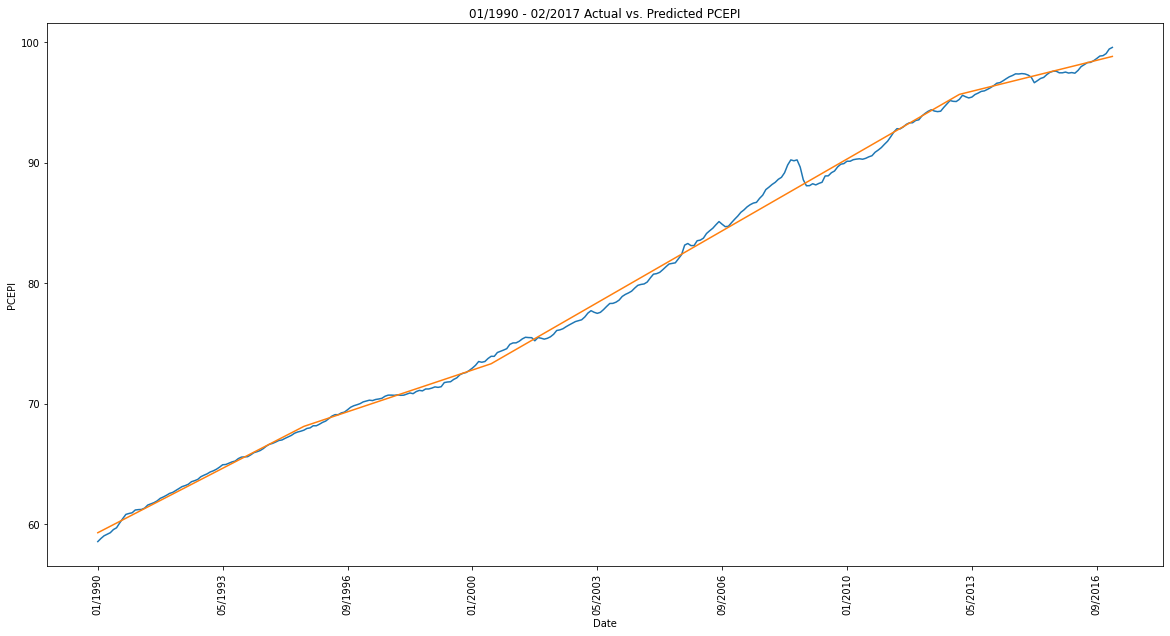

In [8]:
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))
ax = pyplot.axes()
ax.xaxis.set_major_locator(pyplot.MaxNLocator(10))
pyplot.locator_params(axis='x', nbins=10)
pyplot.plot(train['observation_date'], trainY)
pyplot.plot(train['observation_date'], y_hat)
pyplot.xticks(rotation=90)
pyplot.xlabel('Date')
pyplot.ylabel('PCEPI')
#pyplot.legend()
display(train["observation_date"].iloc[0], train["observation_date"].iloc[-1])
pyplot.title(f'{train["observation_date"].iloc[0]} - {train["observation_date"].iloc[-1]} Actual vs. Predicted PCEPI')
pyplot.show()

In [9]:
valX = val.index
valY = val['fred_PCEPI']

y_hat_val = model.predict(valX)

'03/2017'

'12/2023'

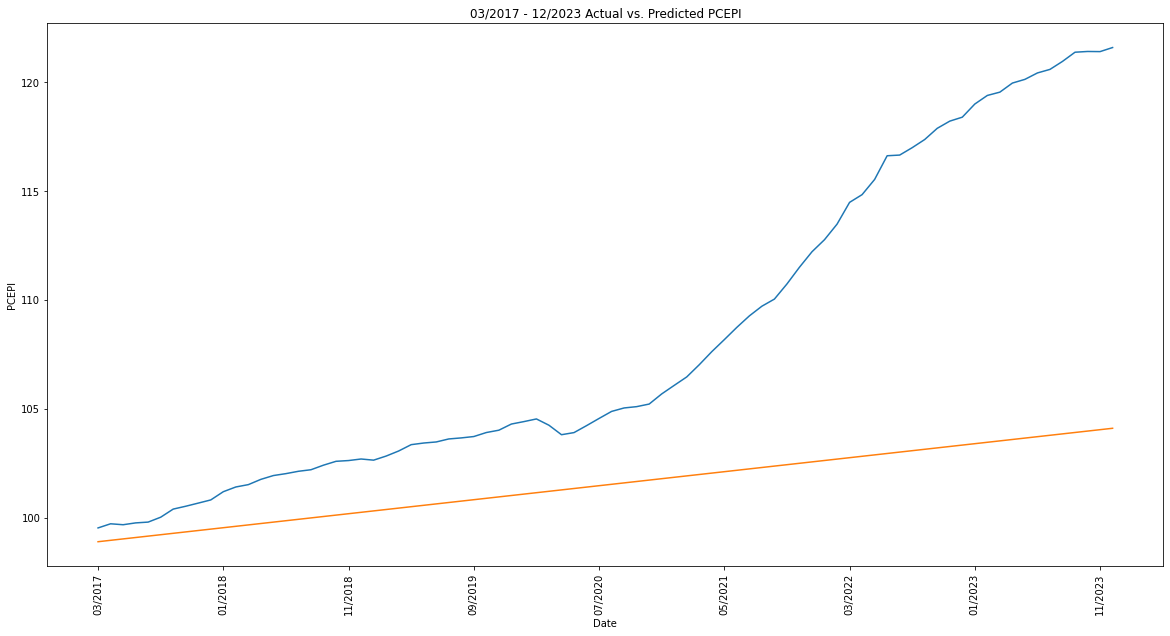

In [10]:

pyplot.figure(figsize=(20, 10))
ax = pyplot.axes()
ax.xaxis.set_major_locator(pyplot.MaxNLocator(10))
pyplot.locator_params(axis='x', nbins=10)
pyplot.plot(val['observation_date'], valY)
pyplot.plot(val['observation_date'], y_hat_val)
pyplot.xticks(rotation=90)
pyplot.xlabel('Date')
pyplot.ylabel('PCEPI')
#pyplot.legend()
display(val["observation_date"].iloc[0], val["observation_date"].iloc[-1])
pyplot.title(f'{val["observation_date"].iloc[0]} - {val["observation_date"].iloc[-1]} Actual vs. Predicted PCEPI')
pyplot.show()

In [11]:
date_col = 'observation_date'
target_col = 'fred_PCEPI'

In [12]:
import numpy as np
y_hats = np.concatenate((y_hat, y_hat_val))
all_dates = pd.concat((train[date_col], val[date_col]))
all_ys = pd.concat((train[target_col], val[target_col])).values

'03/2017'

'12/2023'

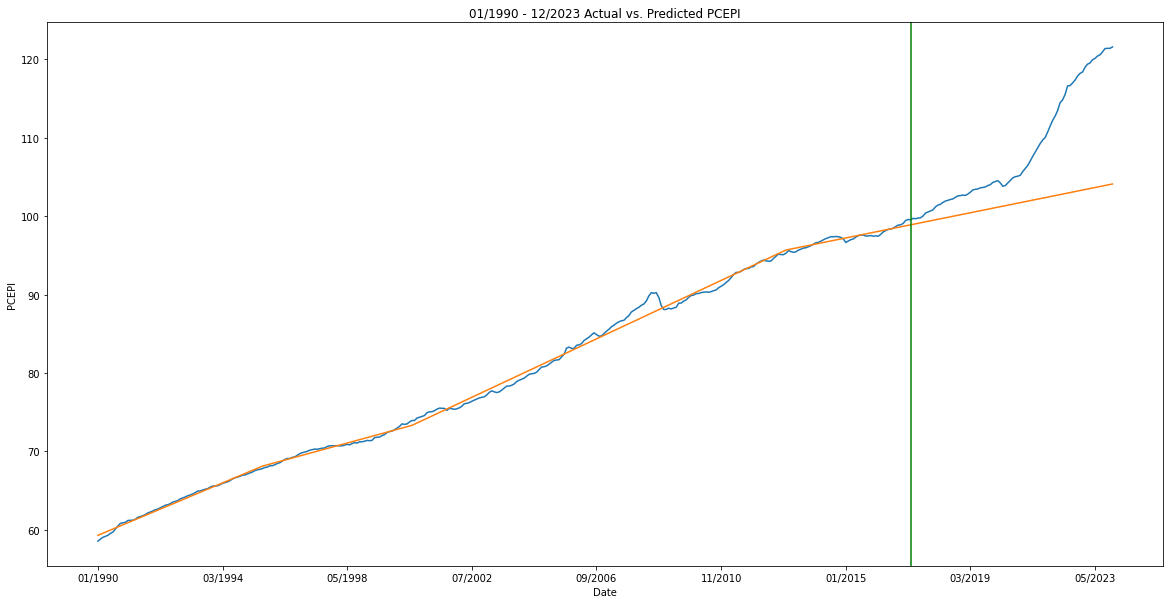

In [ ]:
pyplot.figure(figsize=(20, 10))
ax = pyplot.axes()
ax.xaxis.set_major_locator(pyplot.MaxNLocator(10))
pyplot.locator_params(axis='x', nbins=10)
pyplot.plot(all_dates, all_ys)
pyplot.plot(all_dates, y_hats)
pyplot.axvline(all_dates.iloc[valX[0]], color='g')
pyplot.xlabel('Date')
pyplot.ylabel('PCEPI')
#pyplot.legend()
display(val["observation_date"].iloc[0], val["observation_date"].iloc[-1])
pyplot.title(f'{all_dates.iloc[0]} - {all_dates.iloc[-1]} Actual vs. Predicted PCEPI')
pyplot.show()

### Fit model on entire training set

In [14]:
model.fit(trainNoExogenous.index.values,trainNoExogenous[target_col].values)

Earth(allow_missing=True)

In [15]:
y_hats = model.predict(trainNoExogenous.index.values)

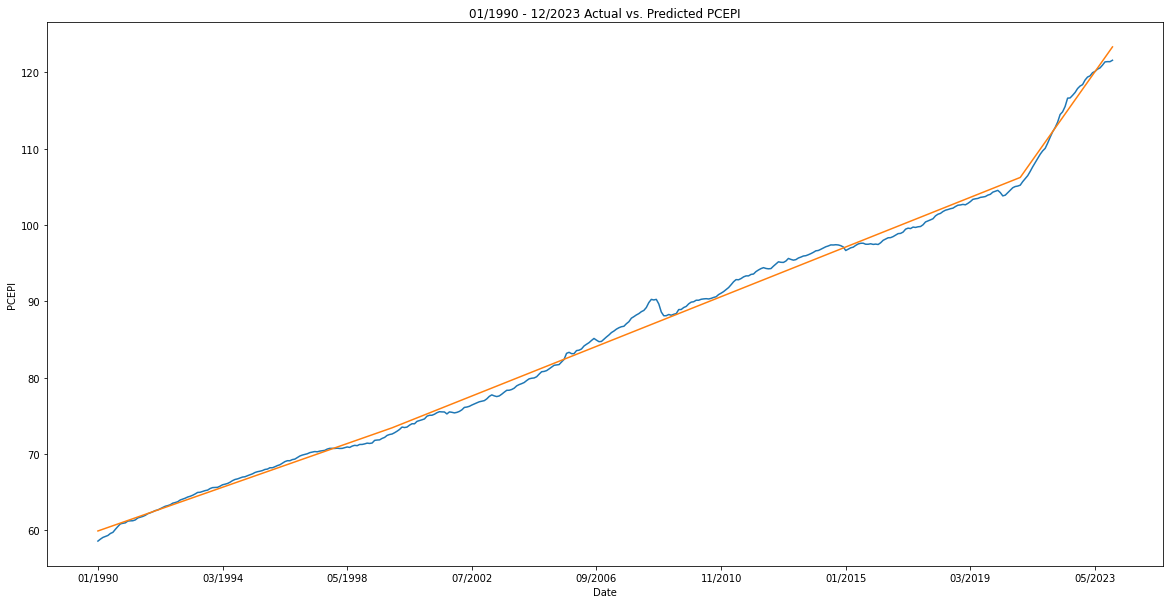

In [16]:
pyplot.figure(figsize=(20, 10))
ax = pyplot.axes()
ax.xaxis.set_major_locator(pyplot.MaxNLocator(10))
pyplot.locator_params(axis='x', nbins=10)
pyplot.plot(all_dates, trainNoExogenous[target_col].values)
pyplot.plot(all_dates, y_hats)
pyplot.xlabel('Date')
pyplot.ylabel('PCEPI')
pyplot.title(f'{all_dates.iloc[0]} - {all_dates.iloc[-1]} Actual vs. Predicted PCEPI')
pyplot.show()

The model has taken into account the terminal uptick in inflation values.

### Make Predictions on Test Set

In [ ]:
from Training.Helper.dataPreprocessing import TEST_DATA_PATH_1990S

test = pd.read_csv(TEST_DATA_PATH_1990S)

test_no_exog = test[[date_col, target_col]]

In [18]:
test_x = test_no_exog.index.values + valX[-1] + 1  # These values should start one after the final validation value
test_y = test_no_exog[target_col].values

In [19]:
horizons = [1, 3, 6, 12]

In [20]:
# Make the predictions (overly complicated since all predictions are the same with this model, but this is standard procedure)
predictions = np.ndarray((len(horizons), len(test)))
for j, horizon in enumerate(horizons):
    preds = np.array([])
    for i in range(horizon, len(test)+1, horizon):
        preds = np.concatenate((preds, model.predict(test_x[:i])[-horizon:]))
    predictions[j,:] = preds

In [21]:
import os
preds_path = os.path.join('..', 'MARSPredictions')
if not os.path.exists(preds_path): os.makedirs(preds_path)
for i, horizon in enumerate(horizons):
    cur_out_dir = os.path.join(preds_path, "Predictions", f"Horizon{horizon}")
    if not os.path.exists(cur_out_dir): os.makedirs(cur_out_dir)
    output_path = os.path.join(cur_out_dir, f"MARS_horizon_{horizon}.npy")
    np.save(output_path, predictions[i])

In [22]:
# Final plot of the whole range of predictions to get an intuition of performance
all_dates = np.concatenate((all_dates, test_no_exog[date_col].values))
y_hats = np.concatenate((y_hats, predictions[0,:]))

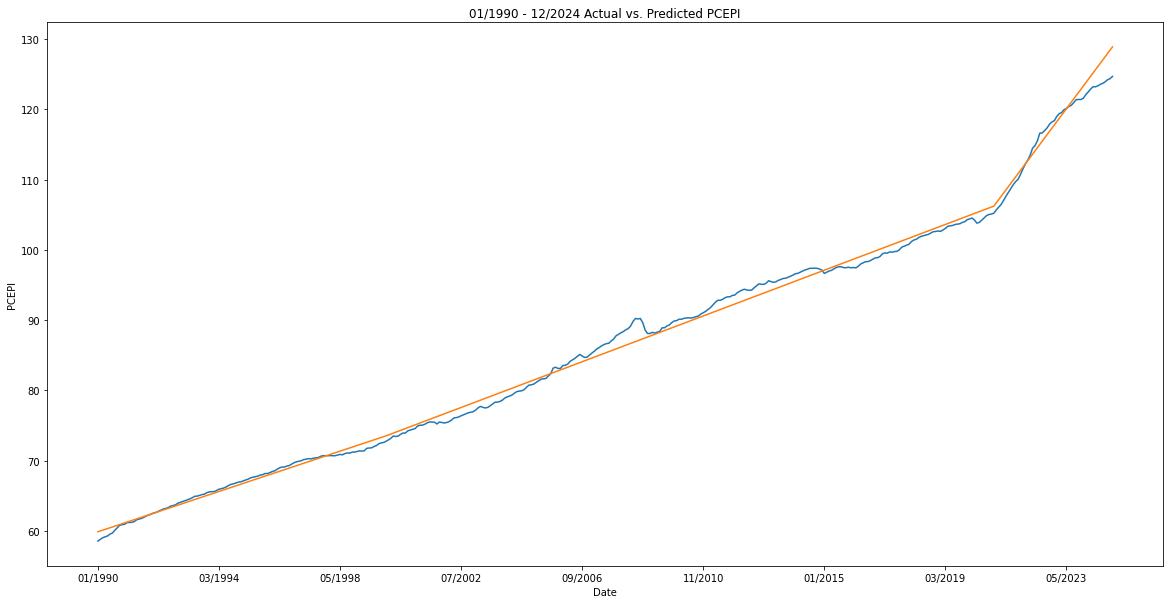

In [23]:
pyplot.figure(figsize=(20, 10))
ax = pyplot.axes()
ax.xaxis.set_major_locator(pyplot.MaxNLocator(10))
pyplot.locator_params(axis='x', nbins=10)
pyplot.plot(all_dates, np.concatenate((trainNoExogenous[target_col].values, test_no_exog[target_col].values)))
pyplot.plot(all_dates, y_hats)
pyplot.xlabel('Date')
pyplot.ylabel('PCEPI')
pyplot.title(f'{all_dates[0]} - {all_dates[-1]} Actual vs. Predicted PCEPI')
pyplot.show()